In [3]:
import pandas as pd

march_data = r"C:\Users\Aaron\OneDrive\New folder\Stat 386\Moneyball\march_madness_results.csv"
march_madness_df = pd.read_csv(march_data)

count_results = march_madness_df.count()
print(count_results)

School                                  1432
Conference                              1432
Season                                  1432
Short Conference Name                   1432
Adjusted Tempo                          1432
                                        ... 
Region                                  1432
Correct Team Name?                        65
Post-Season Tournament                  1432
Post-Season Tournament Sorting Index    1432
Tournament_Result                       1432
Length: 150, dtype: int64


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(march_data)

# Display the column names to identify the correct ones
print(df.columns)

# Define features and target
features = ["Adjusted Tempo", "Adjusted Offensive Efficiency", "Adjusted Defensive Efficiency", 
            "Avg Possession Length (Offense)", "Avg Possession Length (Defense)", "eFGPct", "TOPct", 
            "ORPct", "FTRate", "OffFT", "Off2PtFG", "Off3PtFG", "DefFT", "Def2PtFG", "Def3PtFG", 
            "AdjOE", "AdjDE", "AdjEM", "FG2Pct", "FG3Pct", "FTPct", "BlockPct", "OppFG2Pct", 
            "OppFG3Pct", "OppBlockPct", "FG3Rate", "OppFG3Rate", "ARate", "OppARate", "StlRate"]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df[features])

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = df["Tournament_Result"]

# Use Cross-Validation to find the best alpha
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)  # 5-fold CV, repeated 3 times
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 50), cv=cv, random_state=42, max_iter=100000000)  # Tests 50 alpha values from 0.0001 to 10

# Fit the model
lasso_cv.fit(X, y)

# Get the best alpha
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha}")

# Save the model coefficients
coefficients = pd.Series(lasso_cv.coef_, index=features)
print("Lasso Coefficients:")
print(coefficients)

# Save the coefficients to a CSV file
coefficients.to_csv('lasso_coefficients.csv')

# Display the coefficients
print(coefficients)



Index(['School', 'Conference', 'Season', 'Short Conference Name',
       'Adjusted Tempo', 'Adjusted Tempo Rank', 'Raw Tempo', 'Raw Tempo Rank',
       'Adjusted Offensive Efficiency', 'Adjusted Offensive Efficiency Rank',
       ...
       'Full Team Name', 'Since', 'Active Coaching Length',
       'Active Coaching Length Index', 'Seed', 'Region', 'Correct Team Name?',
       'Post-Season Tournament', 'Post-Season Tournament Sorting Index',
       'Tournament_Result'],
      dtype='object', length=150)


KeyboardInterrupt: 

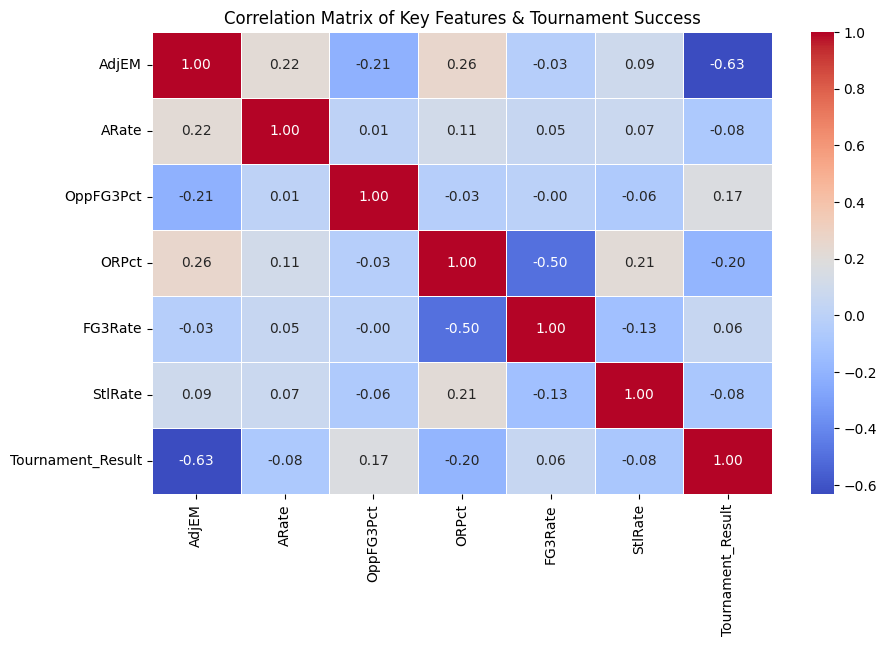

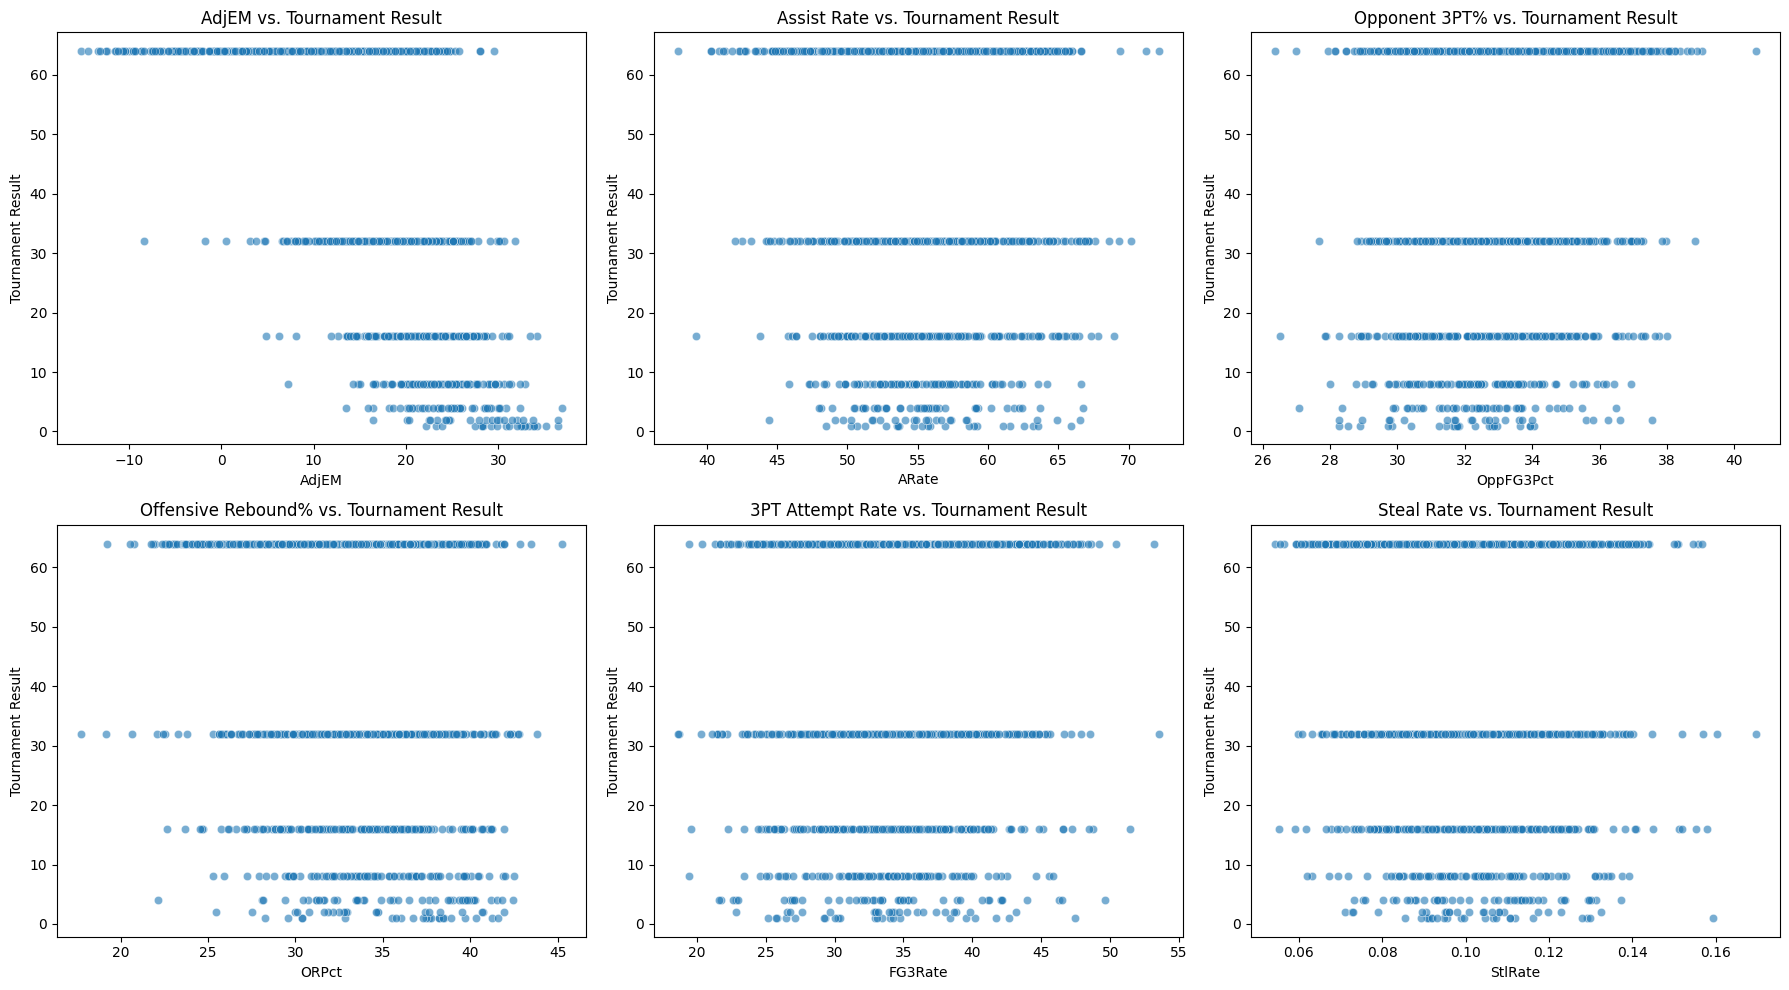

In [4]:
#Verify LASSO results
# Re-import necessary libraries since execution state was reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the dataset
df = pd.read_csv(march_data)

# Select key features from Lasso results for correlation analysis
key_features = ["AdjEM", "ARate", "OppFG3Pct", "ORPct", "FG3Rate", "StlRate", "Tournament_Result"]

# Filter dataset to only include relevant columns
df_filtered = df[key_features].dropna()

# Compute the correlation matrix
correlation_matrix = df_filtered.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Features & Tournament Success")
plt.show()

# Create scatter plots for top Lasso predictors vs. Tournament Result
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

features_to_plot = ["AdjEM", "ARate", "OppFG3Pct", "ORPct", "FG3Rate", "StlRate"]
titles = ["AdjEM vs. Tournament Result", "Assist Rate vs. Tournament Result",
          "Opponent 3PT% vs. Tournament Result", "Offensive Rebound% vs. Tournament Result",
          "3PT Attempt Rate vs. Tournament Result", "Steal Rate vs. Tournament Result"]

for ax, feature, title in zip(axes.flatten(), features_to_plot, titles):
    sns.scatterplot(x=df_filtered[feature], y=df_filtered["Tournament_Result"], alpha=0.6, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(feature)
    ax.set_ylabel("Tournament Result")

plt.tight_layout()
plt.show()

C:\Users\Aaron\AppData\Local\Temp\ipykernel_27732\3867321673.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_filtered["Tournament_Result"], y=df_filtered["ORPct"], palette="coolwarm")


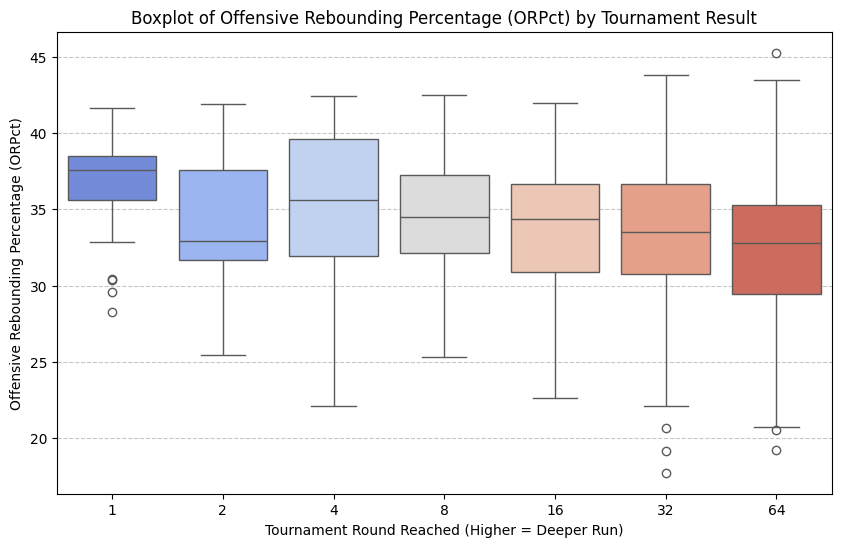

In [5]:
# Re-load necessary libraries and dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Reload the dataset
df = pd.read_csv(march_data)

# Select key features from Lasso results for correlation analysis
key_features = ["ORPct", "Tournament_Result"]

# Filter dataset to only include relevant columns
df_filtered = df[key_features].dropna()

# Boxplot Analysis: Offensive Rebounding Percentage (ORPct) vs. Tournament Result
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered["Tournament_Result"], y=df_filtered["ORPct"], palette="coolwarm")

plt.title("Boxplot of Offensive Rebounding Percentage (ORPct) by Tournament Result")
plt.xlabel("Tournament Round Reached (Higher = Deeper Run)")
plt.ylabel("Offensive Rebounding Percentage (ORPct)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [5]:
import pandas as pd

# Load dataset
data_path = r"C:\Users\Aaron\OneDrive\New folder\Stat 386\Moneyball\march_madness_results.csv"
df = pd.read_csv(data_path)

# Filter relevant features
key_features = ["AdjEM", "ARate", "OppFG3Pct", "ORPct", "FG3Rate", "StlRate", "Tournament_Result"]
df_filtered = df[key_features].dropna()

# Define round categories
round_categories = {
    1: "Champion",
    2: "Runner-Up",
    4: "Final Four",
    8: "Elite 8",
    16: "Sweet 16",
    32: "Round of 32",
    64: "Round of 64"
}

# Calculate ranges for each category
range_data = []

for round_num, round_label in round_categories.items():
    round_data = df_filtered[df_filtered["Tournament_Result"] == round_num]
    
    for feature in key_features[:-1]:
        min_val = round_data[feature].min()
        max_val = round_data[feature].max()
        mean_val = round_data[feature].mean()
        std_val = round_data[feature].std()

        range_data.append({
            "Round": round_label,
            "Feature": feature,
            "Min": min_val,
            "Max": max_val,
            "Mean": mean_val,
            "STD": std_val
        })

# Convert to DataFrame
range_df = pd.DataFrame(range_data)

# Save as CSV
range_df.to_csv("tournament_statistical_ranges.csv", index=False)

print(range_df.head(15))


         Round    Feature        Min        Max       Mean       STD
0     Champion      AdjEM  22.130000  36.426200  30.554900  3.867808
1     Champion      ARate  48.448900  65.928000  56.710190  4.852108
2     Champion  OppFG3Pct  28.264800  34.052800  31.646478  1.742990
3     Champion      ORPct  28.238130  41.605600  36.397490  3.798526
4     Champion    FG3Rate  25.163100  47.459016  33.278665  6.169193
5     Champion    StlRate   0.085500   0.159300   0.106196  0.017816
6    Runner-Up      AdjEM  16.461600  36.483300  26.956445  5.038773
7    Runner-Up      ARate  44.422300  66.575100  55.335346  5.218393
8    Runner-Up  OppFG3Pct  28.263473  37.546500  32.756606  2.527666
9    Runner-Up      ORPct  25.450450  41.916600  34.123719  4.388478
10   Runner-Up    FG3Rate  22.882500  43.151888  33.913483  4.868232
11   Runner-Up    StlRate   0.071000   0.132500   0.099536  0.016353
12  Final Four      AdjEM  13.489600  36.911800  24.580577  4.703247
13  Final Four      ARate  47.9856

C:\Users\Aaron\AppData\Local\Temp\ipykernel_28064\1257591509.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Round", y=metric, data=df, palette="coolwarm")


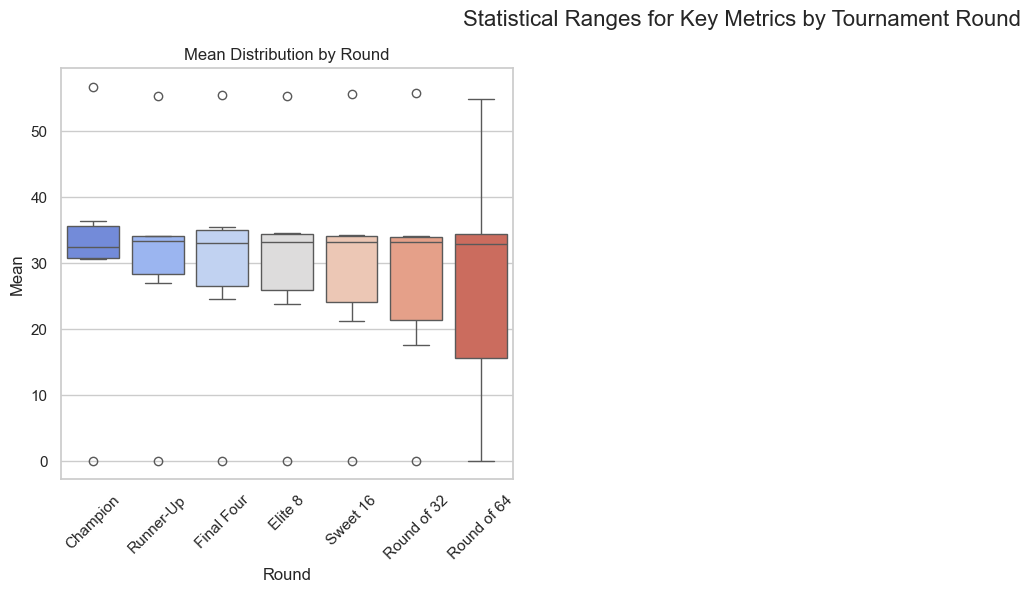

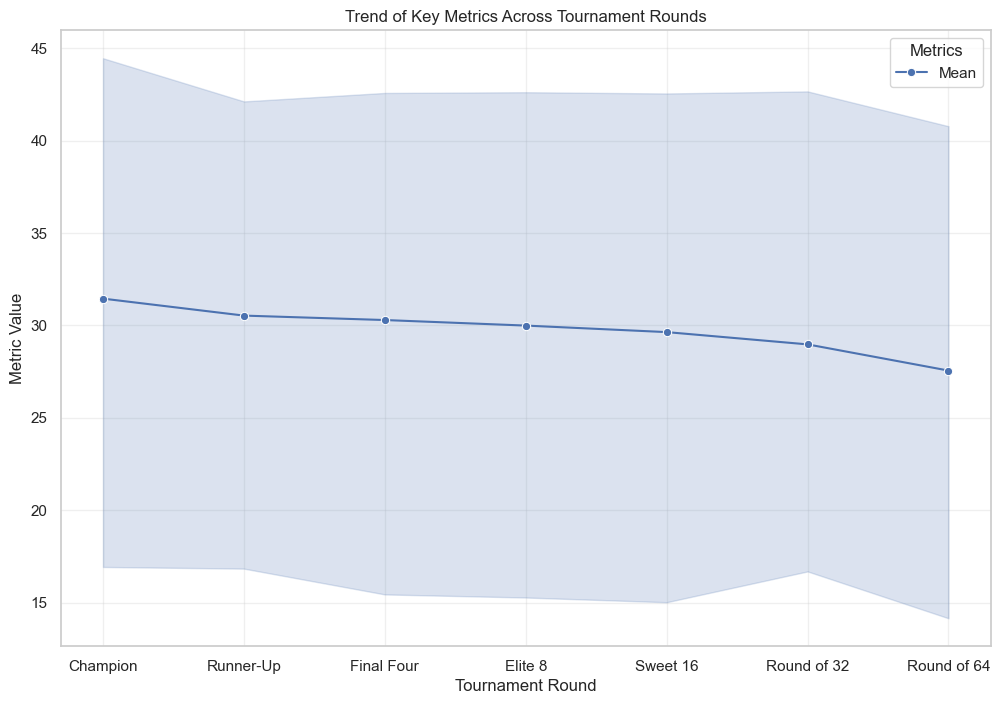

<Figure size 1400x1000 with 0 Axes>

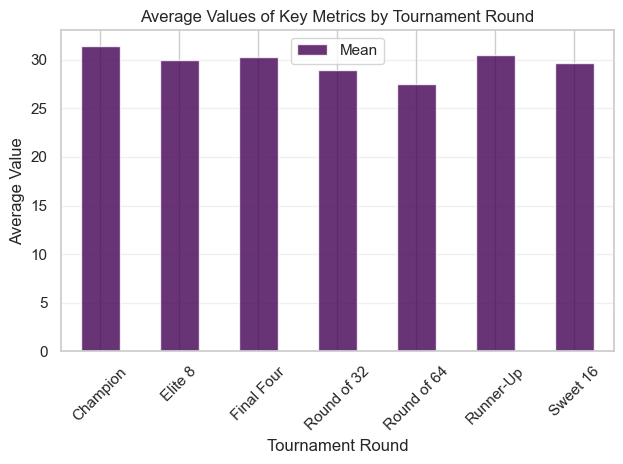

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'tournament_statistical_ranges.csv'
df = pd.read_csv(file_path)

# Set plot style
sns.set(style="whitegrid")

# Define key metrics to plot
# Update key_metrics to include only valid column names from the DataFrame
key_metrics = ["Mean"]  # Replace with actual column names present in the DataFrame

# Boxplot for each metric by tournament round
plt.figure(figsize=(15, 10))
for i, metric in enumerate(key_metrics, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="Round", y=metric, data=df, palette="coolwarm")
    plt.title(f"{metric} Distribution by Round")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle("Statistical Ranges for Key Metrics by Tournament Round", fontsize=16, y=1.02)
plt.show()

# Trend Lines for Key Metrics
plt.figure(figsize=(12, 8))
for metric in key_metrics:
    sns.lineplot(data=df, x="Round", y=metric, label=metric, marker="o")

plt.title("Trend of Key Metrics Across Tournament Rounds")
plt.xlabel("Tournament Round")
plt.ylabel("Metric Value")
plt.legend(title="Metrics")
plt.grid(alpha=0.3)
plt.show()

# Comparative Bar Charts for Key Metrics
mean_values = df.groupby("Round")[key_metrics].mean().reset_index()

plt.figure(figsize=(14, 10))
mean_values.set_index("Round").plot(kind="bar", colormap="viridis", alpha=0.8)
plt.title("Average Values of Key Metrics by Tournament Round")
plt.xlabel("Tournament Round")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load the dataset
data_path = 'march_madness_results.csv'
df = pd.read_csv(data_path)

# Key metrics to analyze
key_metrics = ["ORPct", "ARate", "OppFG3Pct", "FG3Rate", "StlRate", "AdjEM"]

# Tournament rounds
rounds = ["Champion", "Runner-Up", "Final Four", "Elite 8", "Sweet 16", "Round of 32", "Round of 64"]

# Initialize storage for calculated data
output_data = []

# Loop through each round and calculate statistics
for round_name in rounds:
    round_data = df[df["Tournament_Result"] == round_name]
    
    for metric in key_metrics:
        if metric in round_data.columns:
            metric_data = round_data[metric].dropna()

            if len(metric_data) > 1:
                mean_val = metric_data.mean()
                min_val = metric_data.min()
                max_val = metric_data.max()
                std_err = metric_data.std() / np.sqrt(len(metric_data))
                ci_low, ci_high = norm.interval(0.95, loc=mean_val, scale=std_err)

                output_data.append({
                    "Round": round_name,
                    "Metric": metric,
                    "Mean": mean_val,
                    "Min": min_val,
                    "Max": max_val,
                    "95% CI Low": ci_low,
                    "95% CI Upper": ci_high
                })
            else:
                # If not enough data for confidence intervals
                output_data.append({
                    "Round": round_name,
                    "Metric": metric,
                    "Mean": np.nan,
                    "Min": np.nan,
                    "Max": np.nan,
                    "95% CI Low": np.nan,
                    "95% CI Upper": np.nan
                })
        else:
            print(f"Metric '{metric}' not found in the dataset columns.")
            output_data.append({
                "Round": round_name,
                "Metric": metric,
                "Mean": np.nan,
                "Min": np.nan,
                "Max": np.nan,
                "95% CI Low": np.nan,
                "95% CI Upper": np.nan
            })

# Create DataFrame and export to CSV
output_df = pd.DataFrame(output_data)
output_df.to_csv('tournament_statistical_ranges.csv', index=False)

print("Updated 'tournament_statistical_ranges.csv' successfully created.")



Updated 'tournament_statistical_ranges.csv' successfully created.


In [12]:
# Inspect the first few rows of the dataset
print(df.head())

# Check for missing values in key metrics
print(df[key_metrics].isnull().sum())

# Verify unique values in the 'Tournament_Result' column
print(df["Tournament_Result"].unique())


           School Conference  Season Short Conference Name  Adjusted Tempo  \
0  north carolina        ACC    2017                   ACC            71.3   
1       villanova   Big East    2018                    BE            68.7   
2        virginia        ACC    2019                   ACC            59.4   
3        maryland    Big Ten    2002                   ACC            73.7   
4        syracuse        ACC    2003                    BE            71.0   

   Adjusted Tempo Rank  Raw Tempo  Raw Tempo Rank  \
0                   40       72.4              48   
1                  150       70.0             138   
2                  353       60.6             353   
3                   15       75.0              21   
4                   32       72.7              37   

   Adjusted Offensive Efficiency  Adjusted Offensive Efficiency Rank  ...  \
0                          120.7                                   9  ...   
1                          127.8                          

In [13]:
print(df.columns)


Index(['School', 'Conference', 'Season', 'Short Conference Name',
       'Adjusted Tempo', 'Adjusted Tempo Rank', 'Raw Tempo', 'Raw Tempo Rank',
       'Adjusted Offensive Efficiency', 'Adjusted Offensive Efficiency Rank',
       ...
       'Full Team Name', 'Since', 'Active Coaching Length',
       'Active Coaching Length Index', 'Seed', 'Region', 'Correct Team Name?',
       'Post-Season Tournament', 'Post-Season Tournament Sorting Index',
       'Tournament_Result'],
      dtype='object', length=150)


In [14]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Load the dataset
data_path = 'march_madness_results.csv'
df = pd.read_csv(data_path)

# Key metrics to analyze
key_metrics = ["ORPct", "ARate", "OppFG3Pct", "FG3Rate", "StlRate", "AdjEM"]

# Tournament rounds
rounds = [1, 2, 4, 8, 16, 32, 64]
round_labels = ["Champion", "Runner-Up", "Final Four", "Elite 8", "Sweet 16", "Round of 32", "Round of 64"]

# Initialize storage for calculated data
output_data = []

# Loop through each round and calculate statistics
for round_val, round_name in zip(rounds, round_labels):
    round_data = df[df["Tournament_Result"] == round_val]
    
    for metric in key_metrics:
        if metric in round_data.columns:
            metric_data = round_data[metric].dropna()

            if not metric_data.empty:
                mean_val = metric_data.mean()
                min_val = metric_data.min()
                max_val = metric_data.max()
                std_err = metric_data.std() / np.sqrt(len(metric_data)) if len(metric_data) > 1 else 0
                ci_low, ci_high = (np.nan, np.nan) if std_err == 0 else norm.interval(0.95, loc=mean_val, scale=std_err)

                output_data.append({
                    "Round": round_name,
                    "Metric": metric,
                    "Mean": mean_val,
                    "Min": min_val,
                    "Max": max_val,
                    "95% CI Low": ci_low,
                    "95% CI Upper": ci_high
                })
            else:
                # If no data is available, append NaNs
                output_data.append({
                    "Round": round_name,
                    "Metric": metric,
                    "Mean": np.nan,
                    "Min": np.nan,
                    "Max": np.nan,
                    "95% CI Low": np.nan,
                    "95% CI Upper": np.nan
                })
        else:
            print(f"Metric '{metric}' not found in the dataset columns.")

# Create DataFrame and export to CSV
output_df = pd.DataFrame(output_data)
output_df.to_csv('tournament_statistical_ranges.csv', index=False)

print("Updated 'tournament_statistical_ranges.csv' successfully created.")


Updated 'tournament_statistical_ranges.csv' successfully created.


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Target URL for BYU metrics
url = 'https://www.barttorvik.com/team.php?team=BYU'

# Send GET request
response = requests.get(url)
response.raise_for_status()

# Parse HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Extract the metrics table
tables = pd.read_html(str(soup))

# Find the table with desired metrics (AdjEM, ORPct, ARate, FG3Rate, StlRate)
metrics_table = tables[0]  # Assuming the first table is the target

# Display the first few rows to verify
print(metrics_table.head())

# Save to CSV for further analysis
metrics_table.to_csv('byu_metrics.csv', index=False)
print("Data saved to 'byu_metrics.csv'")


C:\Users\Aaron\AppData\Local\Temp\ipykernel_2816\3137878244.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


  Vs: All All Conf. Noncon Top 100 Top 50 Last 10  | Venue: All All H A N A-N  \
                                                                     Category   
0                                          Adj. Eff.                            
1                                               eFG%                            
2                                                TO%                            
3                                                OR%                            
4                                                FTR                            

                                      Unnamed: 5_level_0 Unnamed: 6_level_0  \
  Offense Offense.1 Defense Defense.1            Barthag            Barthag   
0   126.8         5   100.2        64              .9377                 14   
1    57.0         6    51.4       207                NaN                NaN   
2    17.4       196    16.9       188                NaN                NaN   
3    33.7        64    26.4        32

In [4]:
import streamlit as st

# Display the columns in the tournament data
st.write("Columns in tournament data:")
st.write(df.columns)


AttributeError: partially initialized module 'streamlit' has no attribute 'title' (most likely due to a circular import)